In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


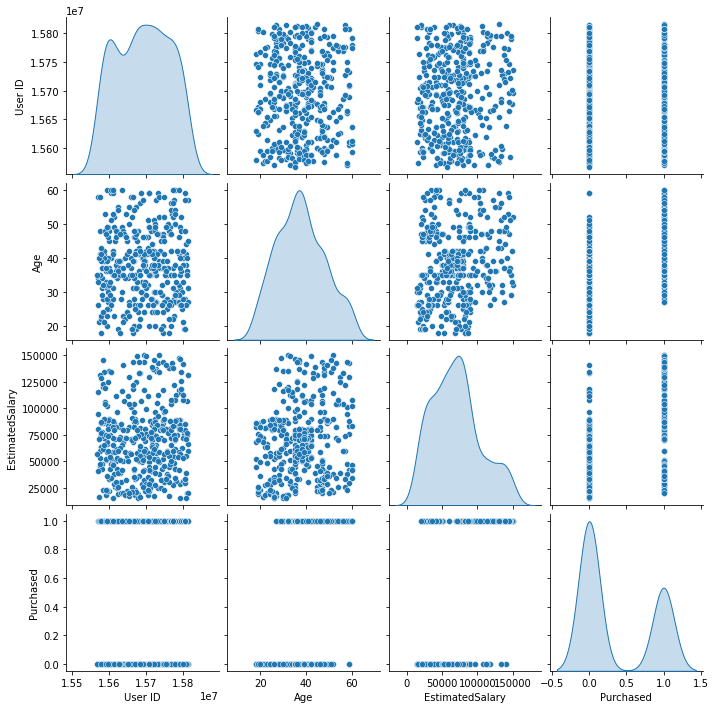

In [4]:
sns.pairplot(data,diag_kind='kde')

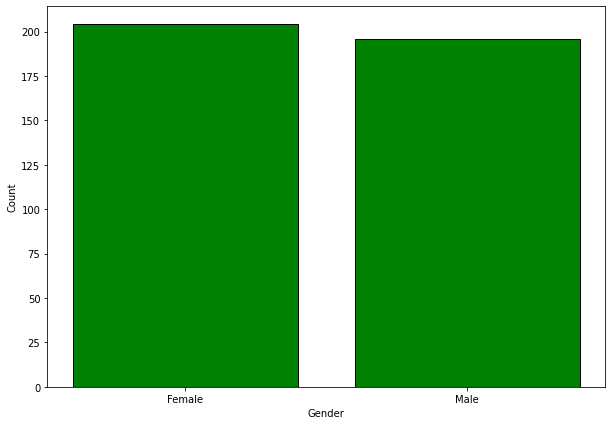

In [5]:
plt.figure(figsize=(10,7))
x1 = data.Gender.value_counts().index
y1 = [data['Gender'].value_counts()[i] for i in x1]  
plt.bar(x1,y1,color='green',edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Charges vs Age Filtered by gender')

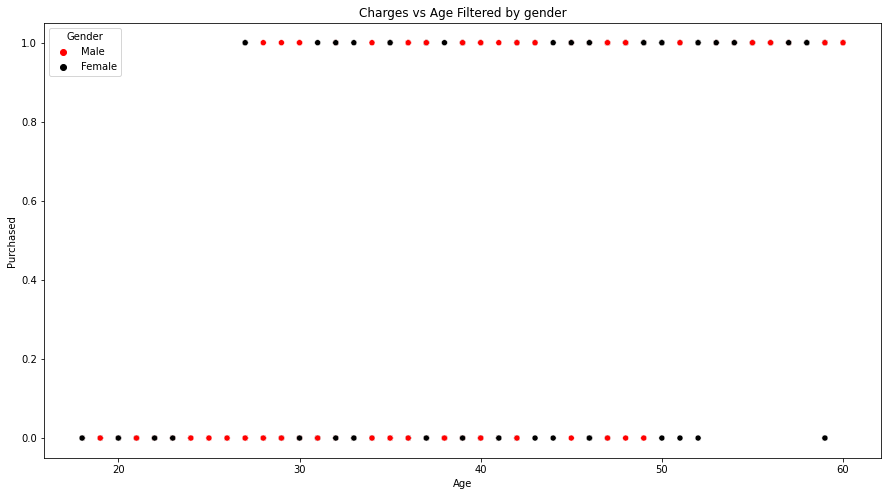

In [6]:
plt.figure(figsize=(15,8))
sns.scatterplot(data.Age,data.Purchased,hue=data.Gender,palette=['red','black'])
plt.title('Charges vs Age Filtered by gender')

In [7]:
x = data['EstimatedSalary'].values

In [8]:
y = data['Purchased'].values

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
from sklearn.linear_model import LogisticRegression
logi_reg = LogisticRegression()

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
x_train = scaler.fit_transform(x_train.reshape(-1,1))
x_test = scaler.fit_transform(x_test.reshape(-1,1))

In [13]:
logi_reg.fit(x_train,y_train)

LogisticRegression()

In [14]:
y_pred = logi_reg.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.825

In [ ]:
cm

array([[56,  2],
       [12, 10]])

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        58
           1       0.83      0.45      0.59        22

    accuracy                           0.82        80
   macro avg       0.83      0.71      0.74        80
weighted avg       0.83      0.82      0.81        80

